In [2]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn 데이터셋에서 보스턴 주택 데이터셋 로딩
from sklearn import datasets
housing = datasets.load_boston()

# 딕셔너리 형태이므로 key 값 확인
housing.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
# 판다스 데이터프레임 변환
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['Target'])
# 데이터셋 크기
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [5]:
df = pd.concat([data, target], axis=1) # axis=1 좌우방향으로 연결.
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [6]:
# 데이터 프레임의 기본 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# 결측값 확인
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

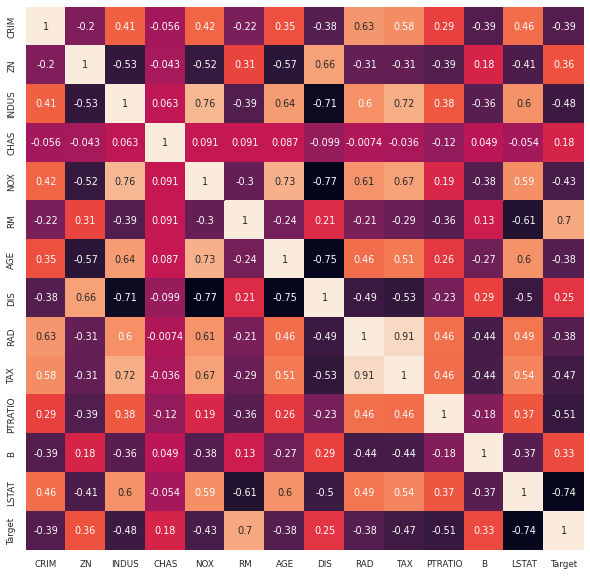

In [14]:
# 상관관계 행렬
df_corr = df.corr()
# df_corr

# 히트맵 그리기
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False);
plt.show()

In [15]:
corr_order = df.corr().loc[:'LSTAT', 'Target'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [17]:
# 시각화로 분석할 피처 선택 추출 - Target 변수와 상관관계가 높은 4개 변수
plot_cols = ['Target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
plot_df = df.loc[:, plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


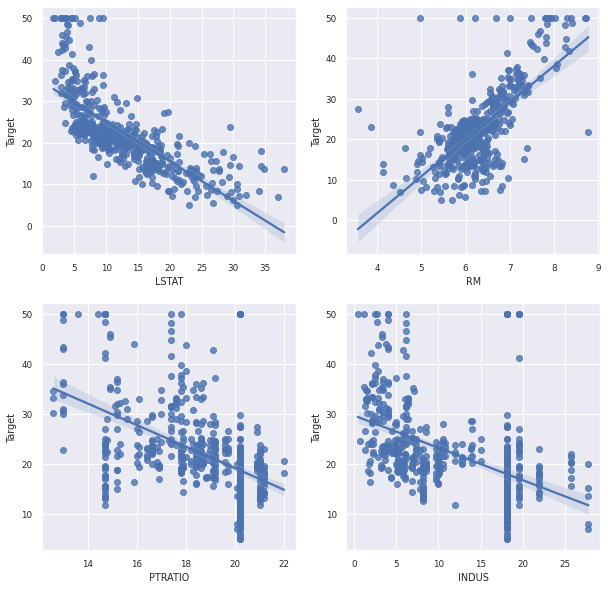

In [18]:
# regplot으로 선형회귀선 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1 = plt.subplot(2, 2, idx+1)
  sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

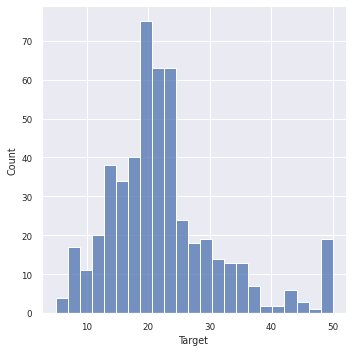

In [19]:
# Target 데이터 분포
sns.displot(x='Target', kind='hist', data=df)
plt.show()

In [20]:
# 데이터 전처리
# 1. 피처 스케일링 - 피처의 데이터 크기에 따른 영향력 차이를 없애기 위해 피처의 크기를 비슷한 수준으로 맞춘다.
# 사이킷런 MinMaxScaler 적용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.iloc[:, :-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

# 스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:, :-1] = df_scaled[:, :]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [22]:
# 학습 - 데이터셋 분할
# EDA (탐색적 데이터 분석. 그냥 위에서 데이터 분석한거)에서 LSTAT, RM의 상관계수가 가장 컸으므로 이 둘을 학습 데이터로 사용.
from sklearn.model_selection import train_test_split
X_data = df.loc[:, ['LSTAT', 'RM']]
y_data = df.loc[:, 'Target']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# 일반적으로 검증 데이터를 10~30% 수준으로 설정한다.
# 교차 검증을 하더라도 검증 데이터의 비중이 낮으면 훈련 데이터에 과대적합하는 것을 막기 어렵다.
# 검증 데이터가 너무 많으면 훈련 데이터가 부족하여 학습이 잘 안될 수 있다.

(404, 2) (404,)
(102, 2) (102,)


In [25]:
# 선형 회귀 모형
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("회귀계수(기울기):", np.round(lr.coef_, 1))
print("상수항(절편):", np.round(lr.intercept_, 1))

회귀계수(기울기): [-24.  26.]
상수항(절편): 16.4


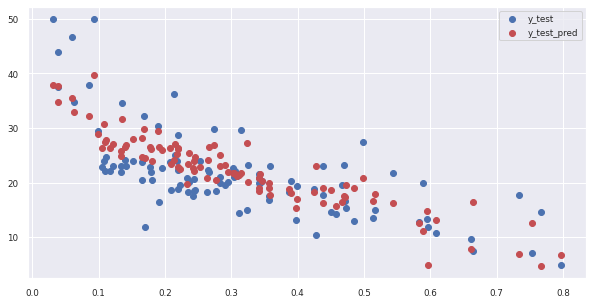

In [28]:
# 예측
y_test_pred = lr.predict(X_test)

# 예측값, 실제값의 분포
plt.figure(figsize=(10,5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')
plt.scatter(X_test['LSTAT'], y_test_pred, c='r', label='y_test_pred')
plt.legend(loc='best')
plt.show()
# 오차가 크다.

In [29]:
# 평가
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f"%train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f"%test_mse)

Train MSE: 31.5002
Test MSE: 26.7829


In [30]:
# 사이킷런 cross_val_score 함수를 이용해 K-Fold 교차검증을 간단하게 할 수 있다.
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_scores, 4))
print("평균 MSE:%.4f"%np.mean(mse_scores))

개별 Fold의 MSE: [-46.1766 -35.2914 -25.4015 -31.4861 -28.7928]
평균 MSE:-33.4297


In [31]:
# 2차 다항식 변환. 1차항으로만 이루어진 식으로 복잡한 데이터를 예측하기 어려울 수 있다.
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
print("원본 데이터셋:", X_train.shape)
print("2차 다항식 변환 데이터셋:", X_train_poly.shape)

원본 데이터셋: (404, 2)
2차 다항식 변환 데이터셋: (404, 6)


In [34]:
# 2차 다항식 변환 데이터셋으로 선형회귀 모형 학습
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"%train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"%test_mse)

Train MSE:20.8278
Test MSE:19.5617


In [36]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=15)
X_train_poly = pf.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"%train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"%test_mse)

Train MSE:10.9132
Test MSE:423163784790.1712


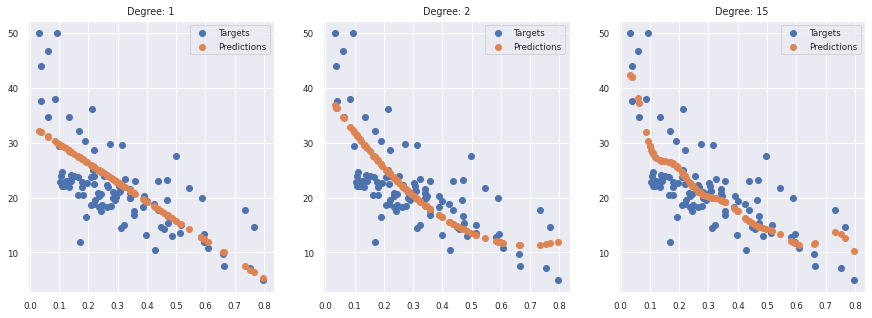

In [37]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1,2,15]):
  ax1 = plt.subplot(1, 3, n+1)

  # degree별 다항 회귀 모형 적용
  pf = PolynomialFeatures(degree=deg)
  X_train_poly = pf.fit_transform(X_train.loc[:, ['LSTAT']])
  X_test_poly = pf.fit_transform(X_test.loc[:, ['LSTAT']])
  lr = LinearRegression()
  lr.fit(X_train_poly, y_train)
  y_test_pred = lr.predict(X_test_poly)

  # 실제값 분포
  plt.scatter(X_test.loc[:, ['LSTAT']], y_test, label='Targets')
  # 예측값 분포
  plt.scatter(X_test.loc[:, ['LSTAT']], y_test_pred, label='Predictions')
  # 제목 표시
  plt.title("Degree: %d"%deg)
  # 범례 표시
  plt.legend()
plt.show()

In [40]:
# Ridge (L2 규제) 가중치의 제곱합에 페널티 부과.
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=2.5)
rdg.fit(X_train_poly, y_train)

y_train_pred = rdg.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"%train_mse)
y_test_pred = rdg.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"%test_mse)

Train MSE:36.9356
Test MSE:34.9759


In [41]:
# Lasso (L1 규제) 가중치의 절대값의 합에 페널티를 부과.
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.05)
las.fit(X_train_poly, y_train)

y_train_pred = las.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"%train_mse)

y_test_pred = las.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"%test_mse)

Train MSE:32.7249
Test MSE:33.4015


In [42]:
# 의사결정나무
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"%train_mse)

y_test_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"%test_mse)

Train MSE:17.8047
Test MSE:21.3814


In [43]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=20)
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"%train_mse)

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"%test_mse)

Train MSE:15.5398
Test MSE:19.2314


In [44]:
# XGBoost
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

y_train_pred = xgbr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f"%train_mse)

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f"%test_mse)

Train MSE:8.2441
Test MSE:19.2314
